# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/project /capstone project 2 /train_revised.csv')

In [ ]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [ ]:
df.shape

(51645, 10)

In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
# Viewing the type 'object' columns description 
df.describe(include = 'object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [ ]:
# Calculation of Target varible based on the ride id
tmp_no_tickect_df = df.groupby(['ride_id']).seat_number.count().rename('number_of_ticket').reset_index()
tmp_no_tickect_df.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [ ]:
# droping the duplicate value rows with the repeating ride_id
df.drop_duplicates('ride_id', inplace = True)

# Dropping the columns which are not relevant to our target variable
df.drop(['seat_number','payment_method','payment_receipt', 'travel_to'], inplace= True, axis = 1)
df.shape

(6249, 6)

In [ ]:
# Merging the calculated target variable column to the dataset based on the ride_id
df = df.merge(tmp_no_tickect_df, how= 'left', on='ride_id')

##EDA

Text(0.5, 1.0, 'Disbribution of number_of_ticket')

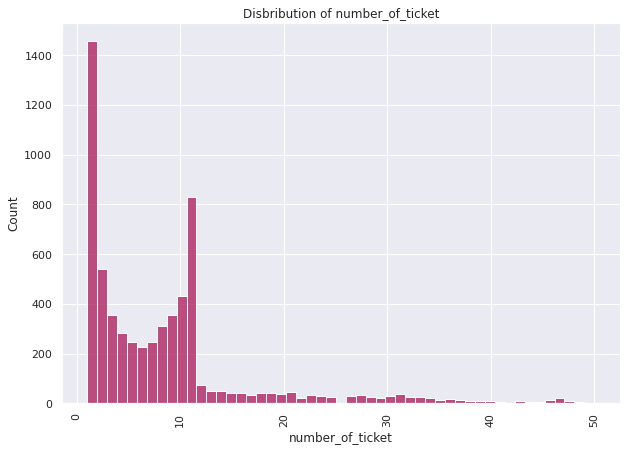

In [ ]:
# Plotting the target variable 'number_of_ticket'
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x='number_of_ticket', data=df, color='#ad1759')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('Disbribution of number_of_ticket')

Text(0.5, 1.0, 'travel_from counts')

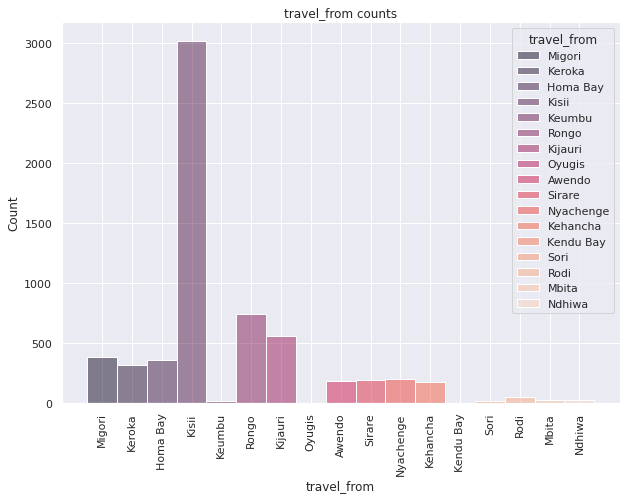

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.histplot(x='travel_from', data=df, hue='travel_from', palette='rocket')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('travel_from counts')

Text(0.5, 1.0, 'car_type counts')

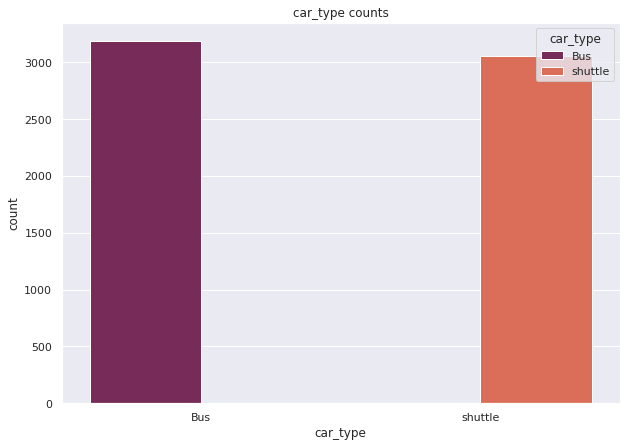

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='car_type', data=df, hue='car_type', palette='rocket')
sns.set_theme(style='darkgrid')
ax.set_xlabel('car_type')
# ax.set_ylabel('Frequency')
ax.set_title('car_type counts')

Text(0.5, 1.0, 'travel_from counts')

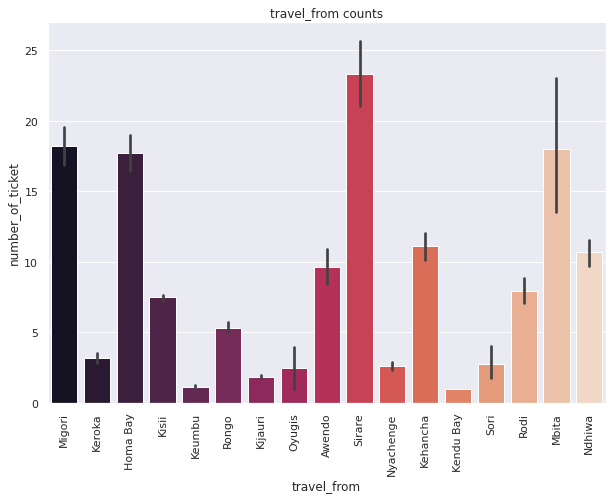

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.barplot(x="travel_from", y="number_of_ticket", data=df, palette= 'rocket')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
# ax.set_xlabel('travel_from')
# ax.set_ylabel('Frequency')
ax.set_title('travel_from counts')

Text(0.5, 1.0, 'max_capacity counts')

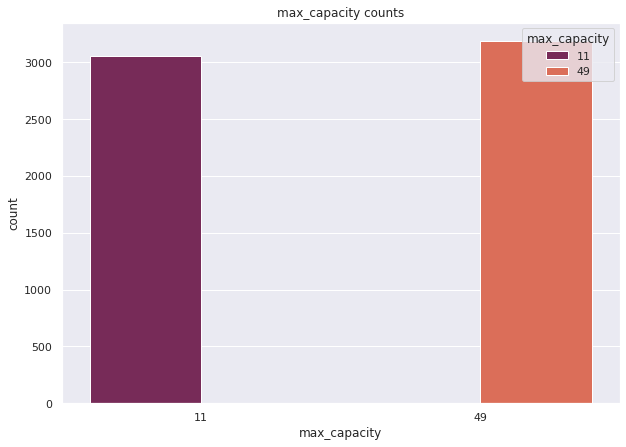

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='max_capacity', data=df, hue='max_capacity', palette='rocket')
sns.set_theme(style='darkgrid')
ax.set_xlabel('max_capacity')
# ax.set_ylabel('Frequency')
ax.set_title('max_capacity counts')

In [ ]:
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Bus,49,1
1,5437,19-11-17,7:12,Migori,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5
4,5778,27-11-17,7:12,Migori,Bus,49,31


In [ ]:
#separate table in x and y

x= df[['max_capacity','number_of_ticket']]
y= df['car_type']

In [ ]:
print(x)

      max_capacity  number_of_ticket
0               49                 1
1               49                 1
2               49                 1
3               49                 5
4               49                31
...            ...               ...
6244            49                11
6245            49                11
6246            49                 1
6247            49                 1
6248            49                 1

[6249 rows x 2 columns]


In [ ]:
print(y)

0       Bus
1       Bus
2       Bus
3       Bus
4       Bus
       ... 
6244    Bus
6245    Bus
6246    Bus
6247    Bus
6248    Bus
Name: car_type, Length: 6249, dtype: object


In [ ]:
##training module 

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(x_train,y_train)

SVC()

In [ ]:
prediction1 = model_svc.predict(x_test)
#predictiong the accuracy 


from sklearn.metrics import accuracy_score
print (accuracy_score(y_test , prediction1)*100)

100.0


In [ ]:
#model 1

#logestic regression 

from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#model 2

#prediction the accuracy 
prediction2 = model_LR.predict(x_test)
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test,prediction2)*100)

100.0


##Conclusion
In this project, we have used  regression-based algorithms like linear regression  and we  found the important features for training the model.
In the linear regression model  Regressor algorithm gives the best results with an accuracy of around 100%.